In [69]:
# If you are using conda then install the follwing packages in your current environment first
# conda install -n ENVNAME PKGNAME PKGNAME PKGNAME ...
# conda install -n Coffee_Roasting pandas tensorflow python=3.9 matplotlib openpyxl

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [98]:
# If you want to see the complete dataset
df = pd.read_excel('Dataset.xlsx')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
print(df)

     Temperature (Celsiuis)  Duration (Minutes)
0                    185.32               12.69
1                    259.92               11.87
2                    231.01               14.41
3                    175.37               11.72
4                    187.12               14.13
5                    225.91               12.10
6                    208.41               14.18
7                    207.08               14.03
8                    280.60               14.23
9                    202.87               12.25
10                   196.70               13.54
11                   270.31               14.60
12                   192.95               15.20
13                   213.57               14.28
14                   164.47               11.92
15                   177.26               15.04
16                   241.77               14.90
17                   237.01               13.13
18                   219.74               13.87
19                   266.39             

In [99]:
# If you want to see the first five rows of the dataset
df = pd.read_excel('Dataset.xlsx')
df.head()

,Temperature (Celsiuis),Duration (Minutes)
0,185.32,12.69
1,259.92,11.87
2,231.01,14.41
3,175.37,11.72
4,187.12,14.13


In [101]:
# If you want to see the last five rows of the dataset
df.tail()

,Temperature (Celsiuis),Duration (Minutes)
195,223.78,15.30
196,266.63,12.48
197,273.68,13.10
198,220.61,12.80
199,284.99,12.73


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature (Celsiuis)  200 non-null    float64
 1   Duration (Minutes)      200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


In [104]:
def load_coffee_data():
    # Read the coffee data from a CSV file using pandas
    data = pd.read_excel('Dataset.xlsx')
    
    # Extract the features and labels as numpy arrays
    X = data.iloc[:, :-1].values
    Y = data.iloc[:, :-1].values
    
    return X, Y

X,Y = load_coffee_data();
print(X.shape, Y.shape)

(200, 1) (200, 1)


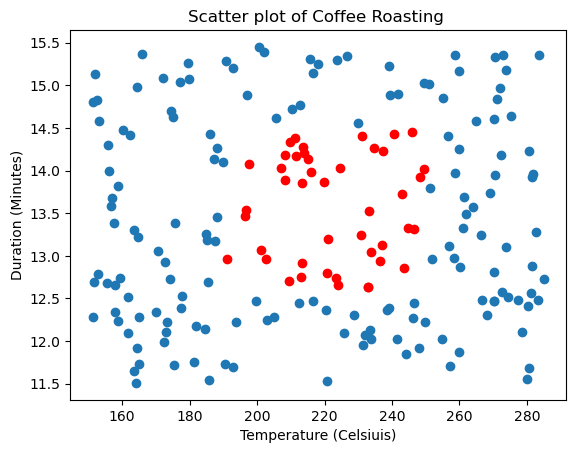

In [95]:
X1 = df['Temperature (Celsiuis)'].values
X2 = df['Duration (Minutes)'].values

# Define the temperature and duration range for changing color
temp_start = 190
temp_end = 250
duration_min_start = 12.5
duration_min_end = 14.5

# Create a boolean array that indicates which points meet the condition
condition = (X1 >= temp_start) & (X1 <= temp_end) & (X2 >= duration_min_start) & (X2 <= duration_min_end)

plt.scatter(X1[~condition], X2[~condition]) # plot non-matching points
plt.scatter(X1[condition], X2[condition], c='red') # plot matching points in red

plt.xlabel("Temperature (Celsiuis)")
plt.ylabel("Duration (Minutes)")
plt.title("Scatter plot of Coffee Roasting ")

plt.show()

### Normalization

In [96]:
# Before normalization
print(f"Temperature Max, Min pre normalization: {np.max(X[:,0]):0.2f}, {np.min(X[:,0]):0.2f}")
print(f"Duration Max, Min pre normalization: {np.max(X[:,0]):0.2f}, {np.min(X[:,0]):0.2f}")

norm_l = tf.keras.layers.Normalization(axis = -1) # apply normalization
norm_l.adapt(X) # Learns means and variance
Xn = norm_l(X)

# After normalization
print(f"Temperature Max, Min Post normalization: {np.max(Xn[:,0]):0.2f}, {np.min(Xn[:,0]):0.2f}")
print(f"Duration Max, Min Post normalization: {np.max(Xn[:,0]):0.2f}, {np.min(Xn[:,0]):0.2f}")

Temperature Max, Min pre normalization: 284.99, 151.32
Duration Max, Min pre normalization: 284.99, 151.32
Temperature Max, Min Post normalization: 1.66, -1.66
Duration Max, Min Post normalization: 1.66, -1.66


In [97]:
# Tile/copy our data to increase the training set size and reduce the number of training epochs.
Xt =np.tile(Xn,(1000,1))
Yt =np.tile(Y, (1000, 1))
print(Xt.shape, Yt.shape)

(200000, 1) (200000, 1)
